In [100]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [101]:
!kaggle datasets download -d iqbalniky/dataset-catdog

 99% 216M/218M [00:12<00:00, 22.6MB/s]
100% 218M/218M [00:12<00:00, 18.5MB/s]


In [103]:
import zipfile
zp = zipfile.ZipFile('/content/dataset-catdog.zip','r')
zp.extractall('/content')
zp.close()

In [104]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [146]:
train_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/train',
  labels = 'inferred',
  label_mode = 'int',
  batch_size = 32,
  image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/test',
  labels = 'inferred',
  label_mode = 'int',
  batch_size = 32,
  image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [147]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [148]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
#model.add(Dense(1,activation = 'sigmoid'))

In [149]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_15 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_16 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                     

In [151]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [152]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 114ms/step - loss: 0.8431 - accuracy: 0.6321 - val_loss: 0.6315 - val_accuracy: 0.6346
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5403 - accuracy: 0.7301 - val_loss: 0.5288 - val_accuracy: 0.7454
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4736 - accuracy: 0.7711 - val_loss: 0.5090 - val_accuracy: 0.7728
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4160 - accuracy: 0.8098 - val_loss: 0.4389 - val_accuracy: 0.7902
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3505 - accuracy: 0.8430 - val_loss: 0.5077 - val_accuracy: 0.7596
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2725 - accuracy: 0.8829 - val_loss: 0.5682 - val_accuracy: 0.8026
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1932 - accuracy: 0.9258 - val_loss: 0.7229 - val_ac

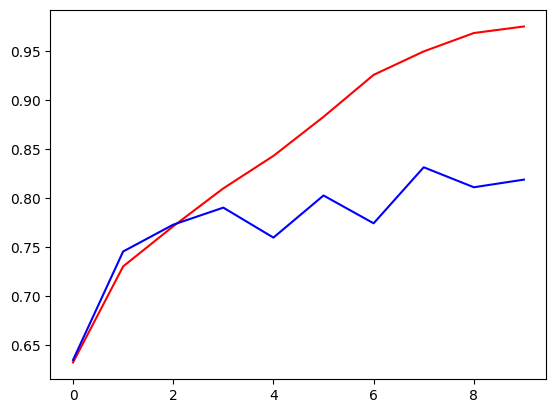

In [153]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue' , label = 'validation')

(126, 105, 3)

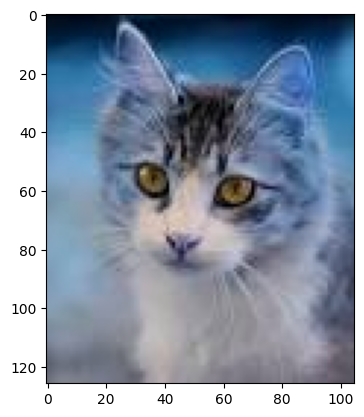

In [200]:
import cv2
test_img = cv2.imread('/content/cat.jpeg')
plt.imshow(test_img)
test_img.shape


In [201]:
test_img = cv2.resize(test_img,(256,256))
t_input = test_img.reshape((1,256,256,3))


In [202]:
prediction = model.predict(t_input)
if prediction == [[0.]]:
  print("It's a cat")
else:
  print("It's a dog")

print(prediction)

1/1 [==============================] - 0s 32ms/step
It's a cat
[[0.]]
